### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

In [2]:
%matplotlib inline

---------------------



### Data Wrangling

In [3]:
# reading data
df = pd.read_csv('archive/2017-fordgobike-tripdata.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

- converting data types into datetime, and to timestamps 

In [5]:
# make a copy of the dataframe 
# fix multiple fields that are not in the correct dtype

df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [6]:
df.user_type  = df.user_type.astype('category')
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_day'] = df.start_time.dt.strftime('%H')
df['start_day_week'] = df.start_time.dt.strftime('%A')
df['start_month'] =  df.start_time.dt.strftime('%B')
df['year'] = df.start_time.dt.strftime('%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,start_date,start_hour_day,start_day_week,start_month,year
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,2017-12-31,16,Sunday,December,2017
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,2017-12-31,15,Sunday,December,2017
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,2017-12-31,22,Sunday,December,2017
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,2017-12-31,17,Sunday,December,2017
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,2017-12-31,14,Sunday,December,2017


------------------
- looking for duplicates.

In [10]:
len(df[df.bike_id.duplicated()])

516027

In [11]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [13]:
len(df[df.start_station_id.isnull()])

0

------------------




- minimum and maximum starting time of rides?

In [14]:
df.start_time.sort_values()

519697   2017-06-28 09:47:36.347
519698   2017-06-28 09:47:41.664
519699   2017-06-28 09:49:46.377
519692   2017-06-28 09:50:59.175
519696   2017-06-28 09:56:39.631
                   ...          
15       2017-12-31 23:53:38.943
22       2017-12-31 23:54:25.337
16       2017-12-31 23:54:40.146
17       2017-12-31 23:55:09.686
20       2017-12-31 23:59:01.261
Name: start_time, Length: 519700, dtype: datetime64[ns]

---

- Start and End stations

In [15]:
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [16]:
df.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Ellsworth St at Russell St                                       2
Empire St at 1st St                                              2
Name: end_station_name, Length: 272, dtype: int64

----
- Minimum and Maximum Duration of ride for Customer and Subscriber

In [17]:
df[(df.user_type == 'Customer')].duration_sec.min()

61

In [18]:
df[(df.user_type == 'Customer')].duration_sec.max()

86369

In [19]:
df[(df.user_type == 'Subscriber')].duration_sec.min()

61

In [20]:
df[(df.user_type == 'Subscriber')].duration_sec.max()

86075

----
# Visualising: 

##### What are the main features in the dataset?

I'm interested in exploring the bike `trips duration` and rental, along with how these relate to the riders' specifics, their  type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for.


- Total duration in seconds of usage of the bike sharing system by Customer and Subscriber in 2017

<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

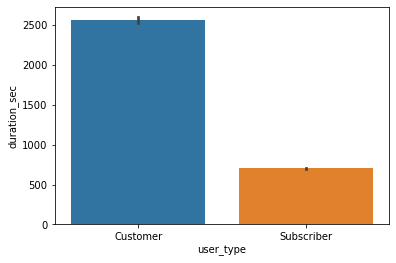

In [21]:
# plot the histogram of user type. 
sb.barplot(x='user_type', y='duration_sec', data=df)

- Customers has a way more time using the bikes sharing system!
----

In [22]:
max_station = df[df.start_station_id == 58.0]

In [23]:
max_station.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,start_date,start_hour_day,start_day_week,start_month,year
57,490,2017-12-31 23:05:28.919,2017-12-31 23:13:39.489,58,Market St at 10th St,37.776619,-122.417385,56,Koshland Park,37.773414,-122.427317,2738,Customer,NaN,NaN,2017-12-31,23,Sunday,December,2017
247,883,2017-12-31 18:51:00.940,2017-12-31 19:05:44.694,58,Market St at 10th St,37.776619,-122.417385,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1746,Subscriber,1995.0,Male,2017-12-31,18,Sunday,December,2017
306,2137,2017-12-31 17:27:38.907,2017-12-31 18:03:16.550,58,Market St at 10th St,37.776619,-122.417385,23,The Embarcadero at Steuart St,37.791464,-122.391034,396,Subscriber,1986.0,Female,2017-12-31,17,Sunday,December,2017
307,2112,2017-12-31 17:27:56.313,2017-12-31 18:03:08.935,58,Market St at 10th St,37.776619,-122.417385,23,The Embarcadero at Steuart St,37.791464,-122.391034,3452,Subscriber,1979.0,Male,2017-12-31,17,Sunday,December,2017
434,447,2017-12-31 16:39:44.874,2017-12-31 16:47:12.781,58,Market St at 10th St,37.776619,-122.417385,89,Division St at Potrero Ave,37.769218,-122.407646,1590,Subscriber,1989.0,Male,2017-12-31,16,Sunday,December,2017


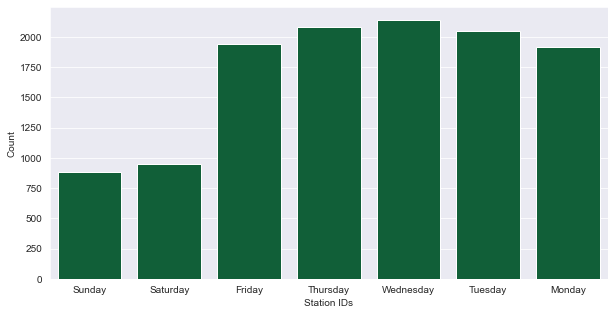

In [24]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype
plt.rcParams['figure.figsize'] = 10, 5
base_color = sb.color_palette('YlGn_r')[0]
sb.set_style('darkgrid')

sb.countplot(data= max_station, x = 'start_day_week', color = base_color);
plt.xlabel('Station IDs');
plt.ylabel('Count');

##### Wednesday has the most usage!

-----
- #Num of trips taken by Customers and Subscribers every month

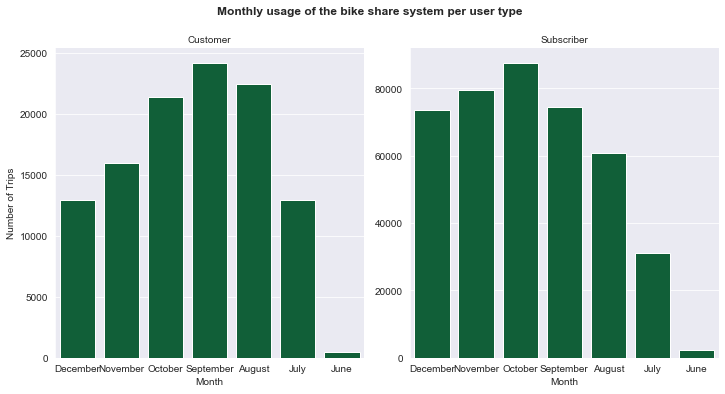

In [25]:
g = sb.catplot(data=df, x='start_month', col="user_type", kind='count', sharey = False,
            color = base_color)

g.set_axis_labels("Month", "Number of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.05, fontsize=12, fontweight='semibold');


In [26]:
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')

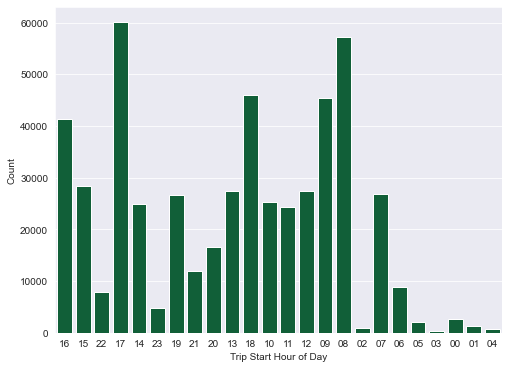

In [27]:
plt.rcParams['figure.figsize'] = 8, 6
sb.set_style('darkgrid')

sb.countplot(data=df, x='start_hour_of_day', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

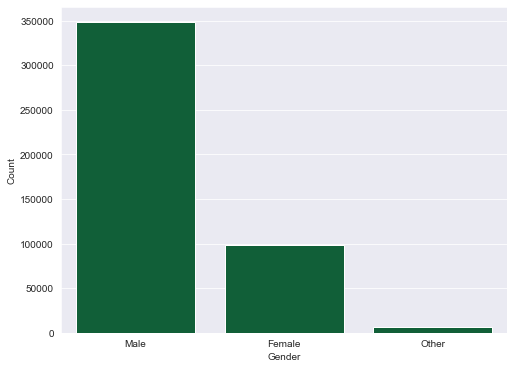

In [28]:
sb.countplot(data=df, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

In [40]:
# adding the age feature!
df['member_age'] = 2021 - df['member_birth_year']

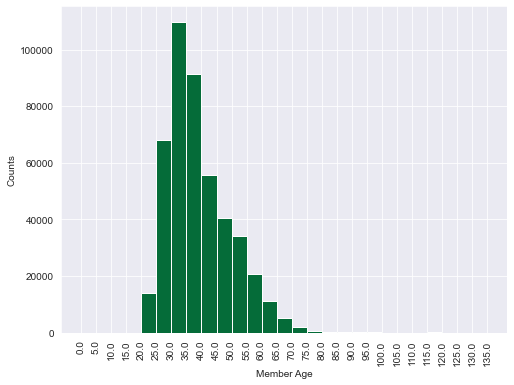

In [30]:
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins, color=base_color);
plt.xticks(bins, bins, rotation=90);
plt.xlabel('Member Age');
plt.ylabel('Counts');

Most riders were male subscribers who did not use bike share for all trips. Most members were around 25 to 40 years old.


-----

<ipython-input-33-7ed4c105fdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_minute'] = df['duration_sec']/60


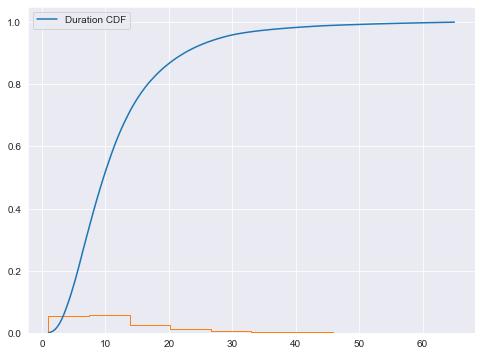

In [33]:
df['duration_minute'] = df['duration_sec']/60
df = df.query('duration_minute <= 65')

s1 = np.sort(df.duration_minute)
cdf = np.linspace(1/df.duration_minute.size, 1, df.duration_minute.size)

plt.plot(s1, cdf, label="Duration CDF");
plt.hist(df.duration_minute, histtype='step', density=True)
plt.legend();

-------------------

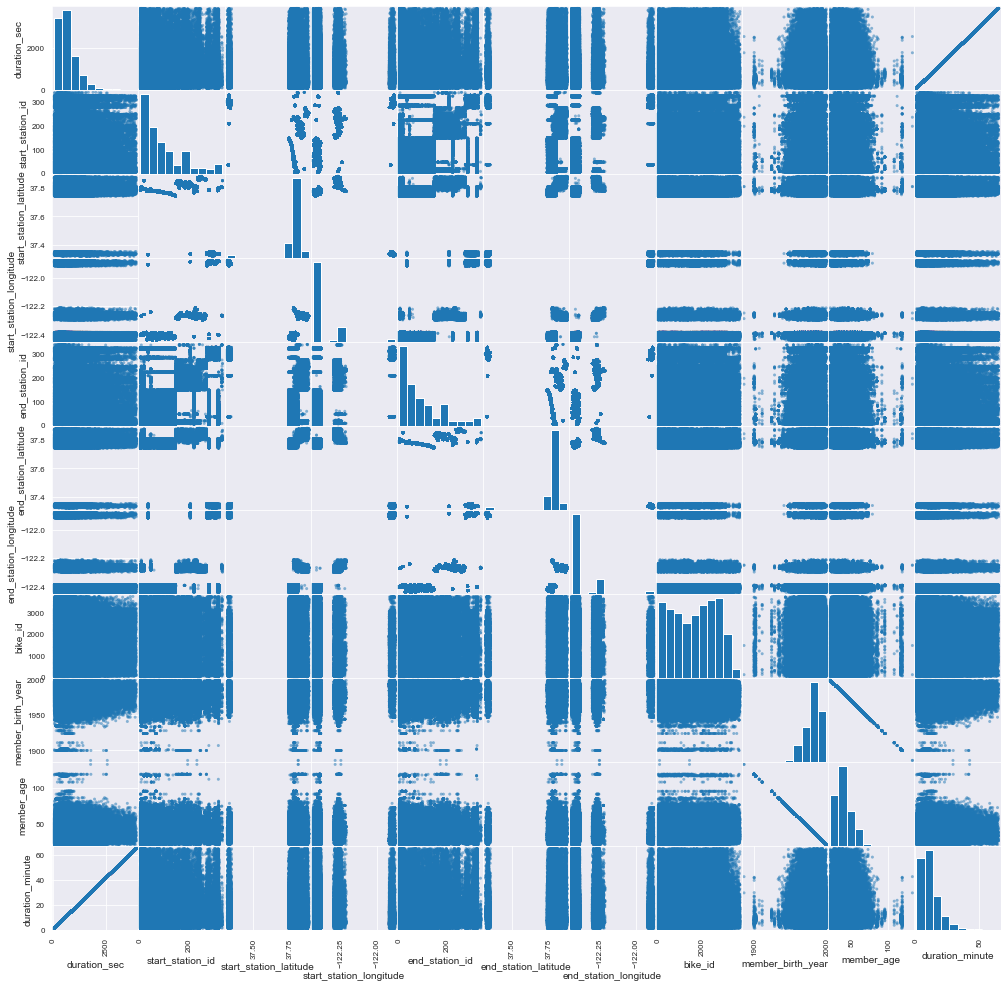

In [37]:
pd.plotting.scatter_matrix(df, figsize=(17,17));

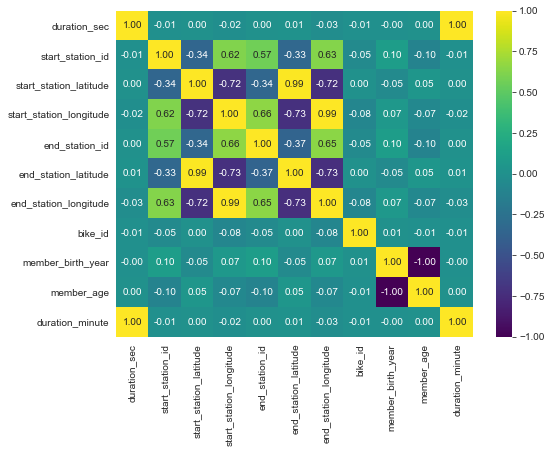

In [39]:
sb.heatmap(df.corr(), annot=True, cmap='viridis', fmt='0.2f');

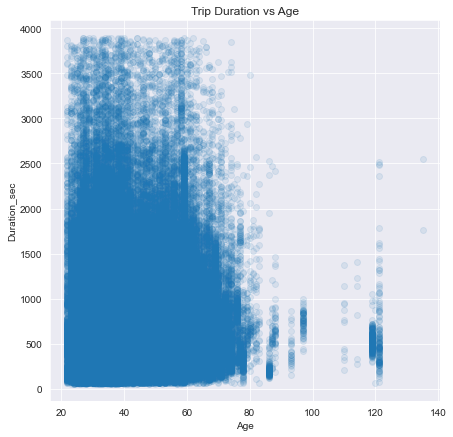

In [50]:
plt.figure(figsize=[7,7])
plt.scatter(df['member_age'], df['duration_sec'], alpha = 0.1, marker = 'o' )
plt.title('Trip Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

Looking for correlation in data!

-----



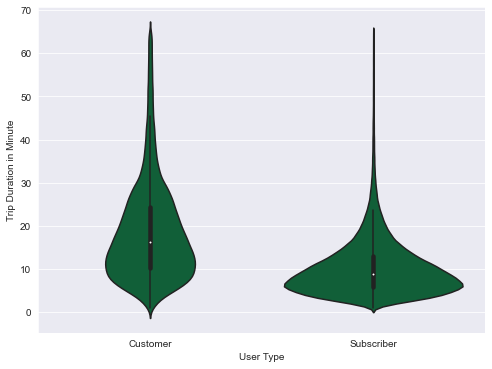

In [32]:
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

seems like subscribers have a more specific usage riding the bikes compared to customers who vary more and generally rented the bikes longer.

----

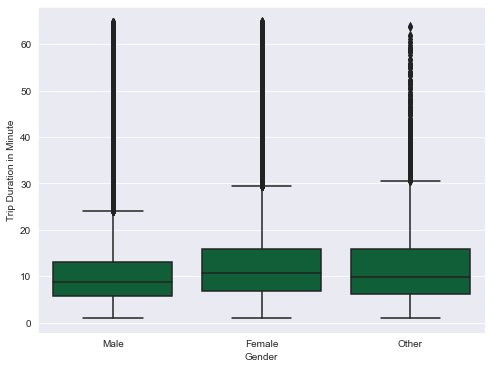

In [33]:
sb.boxplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

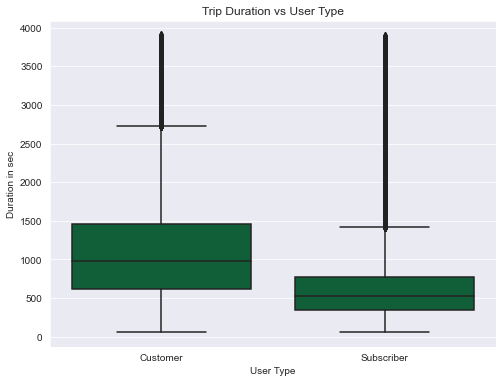

In [53]:
base_color = sb.color_palette('YlGn_r')[0]
sb.set_style('darkgrid')

sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Trip Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in sec')
plt.show()

there's not a huge difference, males tend to have shorter trips compared to females, indicated by both median and shorter Inter Quartile Range.

---

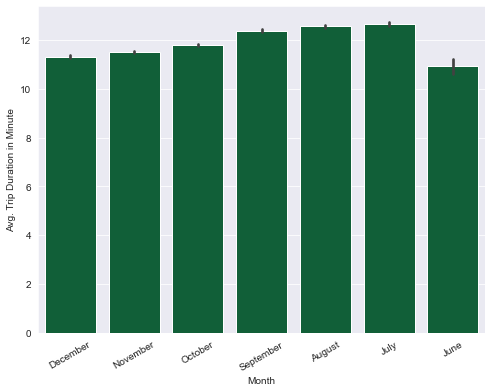

In [34]:
sb.barplot(data=df, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

-  It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends. from March, the avg usage time shows an increasing trend almost all the way til October before it down turned.

----

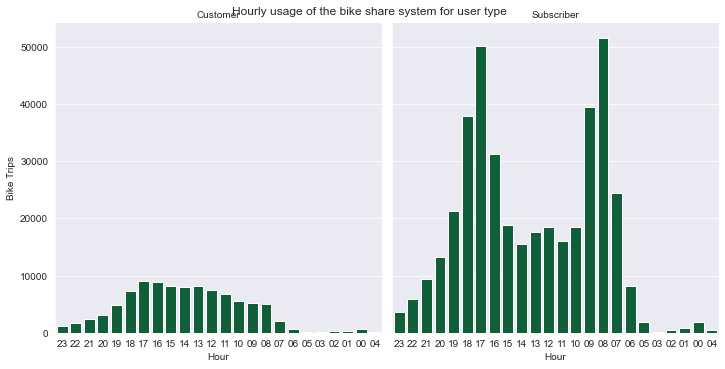

In [35]:
# hourly usege

x = sb.catplot(data=df, x='start_hour_day', col="user_type", kind='count', color = base_color)
x.set_axis_labels("Hour", "Bike Trips")
x.set_titles("{col_name}")
x.fig.suptitle('Hourly usage of the bike share system for user type');

This shows that Subscribers tend to use the system more between 8 - 7 PM, and Customers has a continous pattern

-----------

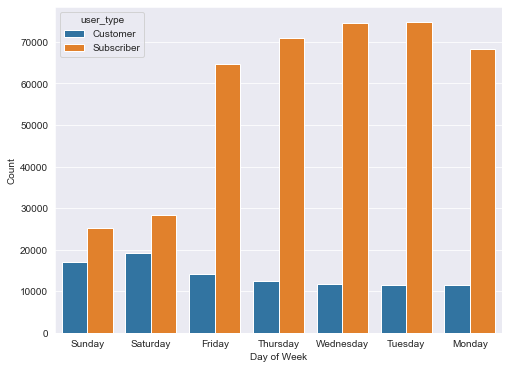

In [36]:
sb.countplot(data=df, x='start_day_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

it seems like Wednesday and teusday has the most time of usage for subscribers! 

---

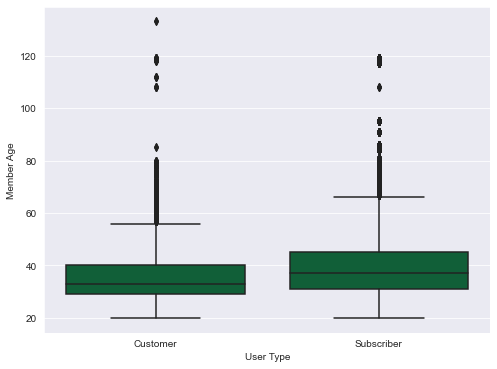

In [37]:
sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

subscribers that ride most often Monday through Friday are slightly older than customers.

---

Title: Trip duration per user type and gender


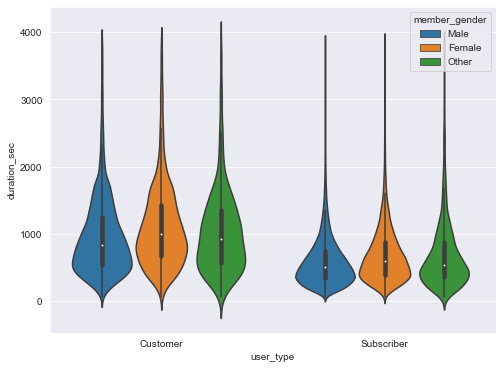

In [38]:
x = sb.violinplot(data=df, x='user_type', y="duration_sec", hue="member_gender")
print('Title: Trip duration per user type and gender')

- Females are taking longer trips in both customer and subscriber classes

----

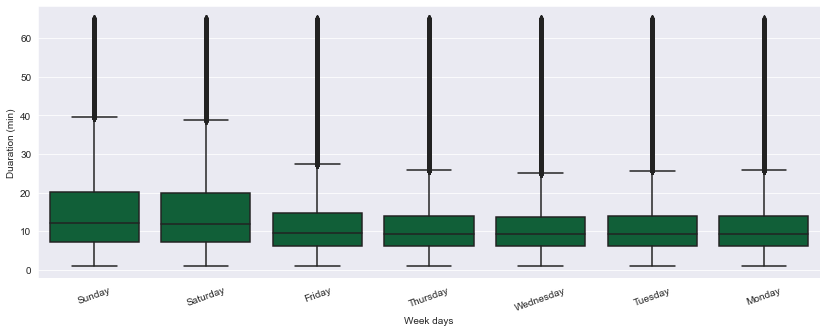

In [39]:
#Trip durations vs days

plt.figure(figsize=[14, 5]);
sb.boxplot(data=df, x= 'start_day_week', y = 'duration_minute', color=base_color)
plt.xlabel('Week days')
plt.ylabel('Duaration (min)')
plt.xticks(rotation=20)
plt.show()

Sunday and Saturday shows the longest day trips amongst days.

----

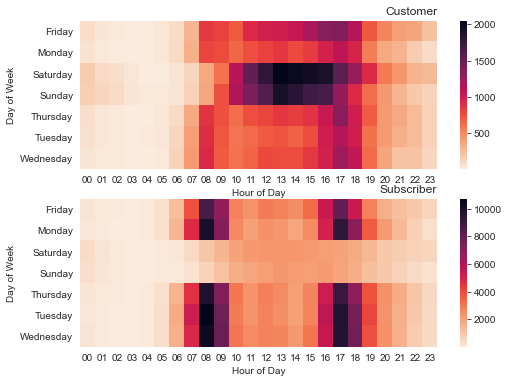

In [40]:
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


Subscribers use the system more on work days, And customers tend to use more in late afternoon!


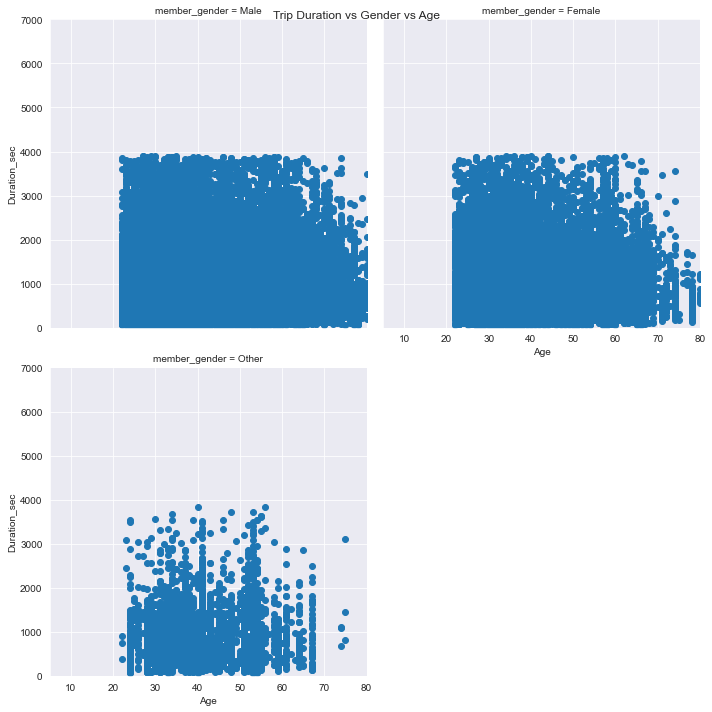

In [62]:
p = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 5, xlim=[5,80], ylim=[0,7000])
p.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)
p.set_xlabels('Age')
p.set_ylabels('Duration_sec')
p.fig.suptitle('Trip Duration vs Gender vs Age')
plt.show();

Male gender shows more density than other and females!